**By:**

    Nathaniel Jackson

    Nia Pillow

    Natalie Smirnoff

    Daniel Lachaud

    Loann Daeninckx

Federal employee salaries are public information under open government law.  In addition, to bring greater transparency to government spending and combat historical pay gaps, many states have enacted pay transparency laws of varying degrees - Maryland is among these states.  As a result, Montgomery County, MD publishes annually, salary information including gross pay and overtime for all active, permanent employees.

The following dataset is from Data Montgomery HR department and was last updated in August 2021. The dataset is comprised of 5 categorical and 3 quantitative variables and a total of 9958 observations. Below is a list of all 8 variables and what they represent:

**Department** – C- Department code for the department to which the employee is assigned.

**Department Name** - C - Name of the County Department to which the employee is assigned.

**Division**	 - C - Name of the division within the County department to which the employee is assigned.

**Gender**	 - C - Gender

**Base Salary** - Q - Annual base salary for the employee at the end of the calendar year. NOTE: This is the projected salary based on employee status and hours the employee is scheduled to work.

**2020 Overtime Pay** – Q - Overtime pay the employee received for hours worked beyond the employee’s normally scheduled workday or workweek. Encompasses all forms of overtime, including pay differential, lunch, and retroactive overtime. Also includes holiday premium and emergency pay.

**2020 Longevity Pay** – Q - Longevity pay the employee received for the length of service in County employment at the end of the calendar year. NOTE: Longevity eligibility criteria are based on the Personnel Regulations and the Collective Bargaining Agreement.

**Grade** -C- Assigned grade for the employee at the end of the calendar year.



**Questions of interest**

We are interested in the following questions:

1 - Longevity pay based on department?

2 - Overtime pay based on department? Was is affected by the pandemic?

3 - Which department is paying out the most base pay and overtime pay?

4 - Who has the highest base pay per grade? 

5 - Which department employs the most people?

6 - How do departments pay based on gender?

We chose to focus primarily on the salaries based on gender and explored the data further based on that.


**Load Necessary Python Libraries**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import bootstrap

**Read in Dataset**

In [ ]:
df = pd.read_csv("Employee_Salaries_2020.csv")
# Quick glimpse of dataset
df.head()


,Department,Department Name,Division,Gender,Base Salary,2020 Overtime Pay,2020 Longevity Pay,Grade
0,ABS,Alcohol Beverage Services,Wholesale Administration,F,78902.0,199.17,0.00,18
1,ABS,Alcohol Beverage Services,Administrative Services,F,35926.0,0.00,4038.91,16
2,ABS,Alcohol Beverage Services,Administration,M,167345.0,0.00,0.00,M2
3,ABS,Alcohol Beverage Services,Wholesale Operations,F,90848.0,0.00,5717.68,21
4,ABS,Alcohol Beverage Services,Administration,F,78902.0,205.16,2460.24,18


**Are there any null values?**

In [ ]:
# How many Null values does each column have?
df.isnull().sum()

Department            0
Department Name       0
Division              0
Gender                0
Base Salary           0
2020 Overtime Pay     0
2020 Longevity Pay    0
Grade                 0
dtype: int64

**Removing Useless or Redundant Columns**





In [ ]:
# We are not interested in the division column. For simplicity we are removing it.
# We are also dropping the abreviation codes for the departments 
# We will also shuffle the dataset.
df = df[['Department Name', 'Gender', 'Base Salary', '2020 Overtime Pay', '2020 Longevity Pay']]
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Department Name,Gender,Base Salary,2020 Overtime Pay,2020 Longevity Pay
0,Department of Transportation,M,47414.07,5327.01,0.0
1,Department of Health and Human Services,F,67726.73,0.00,0.0
2,Department of Transportation,M,49848.50,743.36,0.0
3,Office of Public Information,F,51228.41,0.00,0.0
4,Alcohol Beverage Services,M,34316.00,389.36,0.0


**Display a table of Statistics, Data Type and Shape**

In [ ]:
# Display a table of statistics
df.describe(include='all')



,Department Name,Gender,Base Salary,2020 Overtime Pay,2020 Longevity Pay
count,9958,9958,9958.000000,9958.000000,9958.000000
unique,40,2,NaN,NaN,NaN
top,Department of Police,M,NaN,NaN,NaN
freq,1940,5867,NaN,NaN,NaN
mean,NaN,NaN,78771.464060,5182.163123,923.572259
std,NaN,NaN,30153.168916,11062.665975,2043.593190
min,NaN,NaN,11147.240000,0.000000,0.000000
25%,NaN,NaN,56994.082500,0.000000,0.000000
50%,NaN,NaN,75290.000000,414.995000,0.000000
75%,NaN,NaN,94668.000000,5394.387500,0.000000


In [ ]:
# Data Type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9958 entries, 0 to 9957
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Department Name     9958 non-null   object 
 1   Gender              9958 non-null   object 
 2   Base Salary         9958 non-null   float64
 3   2020 Overtime Pay   9958 non-null   float64
 4   2020 Longevity Pay  9958 non-null   float64
dtypes: float64(3), object(2)
memory usage: 389.1+ KB


In [ ]:
# Data shape. The number of items and columns.
df.shape

(9958, 5)

Which department has more employees?

In [ ]:
# Number of Employees per Department
df['Department Name'].value_counts()

Department of Police                                    1940
Department of Health and Human Services                 1734
Fire and Rescue Services                                1358
Department of Transportation                            1323
Correction and Rehabilitation                            525
Alcohol Beverage Services                                438
Department of General Services                           416
Department of Public Libraries                           389
Department of Permitting Services                        227
Sheriff's Office                                         210
Department of Environmental Protection                   161
Department of Recreation                                 148
Department of Technology Services                        147
Department of Finance                                    119
County Council                                            99
Department of Housing and Community Affairs               91
Community Engagement Clu

Statistics by Gender

In [ ]:
#Labor Force by Gender
df.Gender.value_counts()

M    5867
F    4091
Name: Gender, dtype: int64

In [ ]:
# Labor Force by Department/Gender

df.groupby(['Department Name','Gender']).aggregate('Department Name').count()

Department Name                  Gender
Alcohol Beverage Services        F          90
                                 M         348
Board of Appeals Department      F           3
Board of Elections               F          22
                                 M           7
                                          ... 
Office of the Inspector General  M           4
Offices of the County Executive  F          24
                                 M          13
Sheriff's Office                 F          57
                                 M         153
Name: Department Name, Length: 77, dtype: int64

In [ ]:
# Average Salary By Gender
df.groupby('Gender').mean()

,Base Salary,2020 Overtime Pay,2020 Longevity Pay
Gender,,,
F,76763.832068,2224.741322,738.709998
M,80171.365625,7244.343554,1052.474853


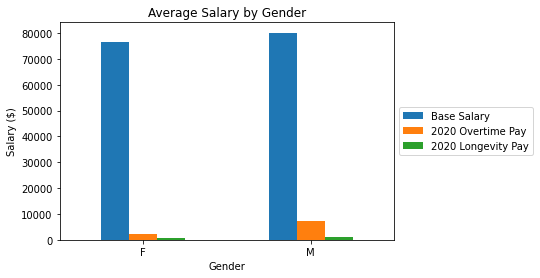

In [ ]:
df.groupby('Gender').mean().plot(kind="bar")
plt.title("Average Salary by Gender")
plt.xlabel("Gender")
plt.xticks(rotation=0   )
plt.ylabel("Salary ($)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Average Salary per department

In [ ]:
round(df.groupby('Department Name').mean(), 2)

,Base Salary,2020 Overtime Pay,2020 Longevity Pay
Department Name,,,
Alcohol Beverage Services,56071.32,1804.96,283.62
Board of Appeals Department,94044.97,0.00,0.00
Board of Elections,81829.79,19141.67,443.85
Community Engagement Cluster,69481.67,2495.99,68.91
Community Use of Public Facilities,88778.09,267.18,379.02
Correction and Rehabilitation,77745.89,15978.59,574.55
County Attorney's Office,115512.61,90.87,341.60
County Council,95375.49,66.65,76.85
Department of Environmental Protection,96362.37,3034.45,990.76


Text(0, 0.5, 'Frequency')

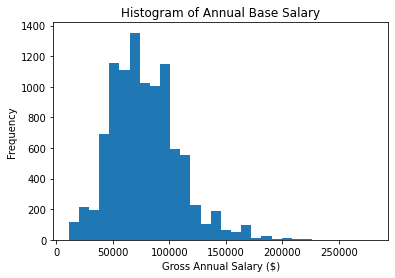

In [ ]:
# Histogram of Annual Base Salary
plt.hist(round(df['Base Salary'],0), 30, log = False)
plt.title("Histogram of Annual Base Salary")
plt.xlabel("Gross Annual Salary ($)")
plt.xticks(rotation=0)
plt.ylabel("Frequency")

Now that we have an idea of the levels of pay we can expect, let's find what departments we should work in to get paid the most by gender.

**Top 5 Departments for Highest Base Salaries for Males**

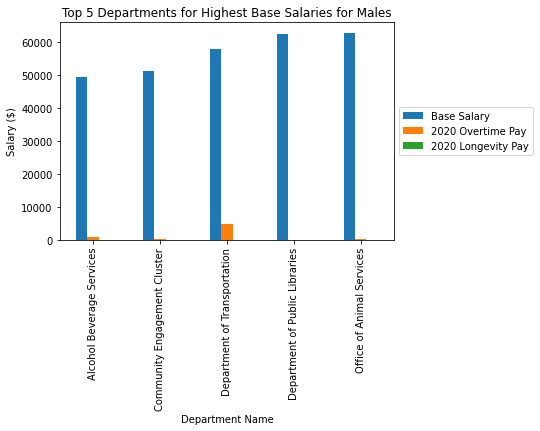

In [ ]:
df.loc[df['Gender'] == 'M'].groupby('Department Name').median().sort_values(by=['Base Salary']).head(5).plot(kind="bar")
#Above we sorted out the relevant columns, grouped by department and took the means of salaries. Selected the top 5 means and graphed the barchart.
plt.title("Top 5 Departments for Highest Base Salaries for Males")
plt.ylabel("Salary ($)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

**Top 5 Departments for Highest Base Salaries for Females**

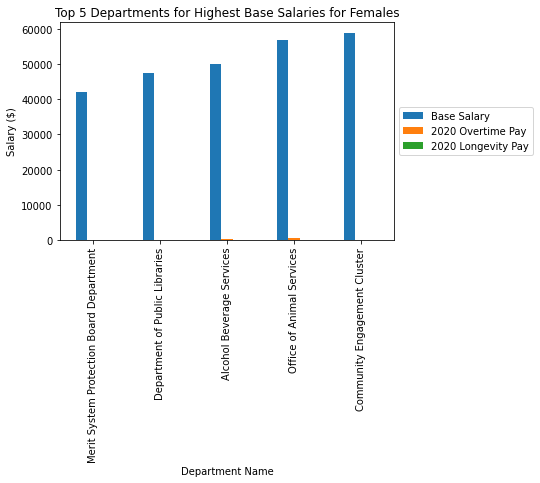

In [ ]:
df.loc[df['Gender'] == 'F'].groupby('Department Name').median().sort_values(by=['Base Salary']).head(5).plot(kind="bar")
plt.title("Top 5 Departments for Highest Base Salaries for Females")
plt.ylabel("Salary ($)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

**Bootstrapping - (Nonparametric Inference)**

In [ ]:
# Simulate a nonparametric inference of the Median for "Base Salary"
print('Dataset Median Base Salary: ${:.2f}'.format(df['Base Salary'].median()))
median_samples = []
# Sample size should be about 10% of the data with replacement, then take median
for i in range(1000):
  sample = df['Base Salary'].sample(frac = .10, replace = True)                    
  median_samples.append(np.median(sample))
        
print('Samples Median Base Salary: ${:.2f}'.format(np.mean(median_samples)))

Dataset Median Base Salary: $75290.00
Samples Median Base Salary: $75457.24


In [ ]:
# Calculate confidence interval
conf_int = np.percentile(median_samples, [2.5, 97.5]) # The middle 95% interval
print('95% Confidence Interval: ${:.2f} to ${:.2f}'.format(conf_int[0],conf_int[1]))

95% Confidence Interval: $72088.43 to $78894.00


Display Chart of Confidence Interval 

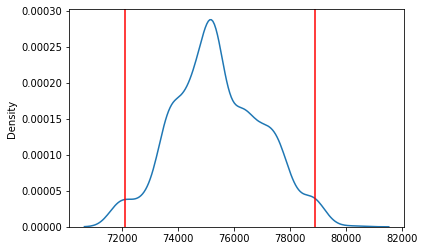

In [ ]:
sns.kdeplot(median_samples)
for endpoint in conf_int:
    plt.axvline(endpoint, color='red')

Based on the graphs above for the Top 5 Paying Departments per gender, we have concluded that the Office for Animal Services is the best paying Department overall, and the Comminuty Engagement Cluster is the best paying Department for women. Additionally, you can see that the decline in salaries for women is much steeper than it is for men, as the lowest paying Department for women is about $8k below the lowest paying Department for men, even though the highest paying departments are around the same starting point. Interestingly, that lowest paying department for women only has 2 people working in it, so there is argument on whether that department should even be included at all. 